__Stars Classification__

Project Overview: This project aims to classify the type of stars based on classification techniques learned in class.

__ATTN: This entire proposal was written by me (Pamela Peng 87802443). As discussed with Tony and Professor Nguyen, my group failed to respond and contribute any work by Saturday, October 29 despite me constantly messaging them.__

__Predicting Star Spectral Type through Classification__ 

In this project, I aim to use classification techniques in class to predict the star spectral type through various predictors. A galaxy’s evolution, history and dynamics can be traced by the composition of its stars. Stars can be classified based on many factors such as Temperature, Luminosity, Radius, Absolute Magnitude, Colour, Type and Spectral Class which is the spectrum emitted by the star. 7 spectral class of stars include O, B, A, F, G, K, and M and it appears that surface temperature and relative radius correlates with the spectral class of stars. Temperature decreases from O to M respectively (40 000K to 3200K) and the relative radius of the stars tend to decrease at a smaller scale from O to M (10 to 0.3). __My predictive question will if we can use classification techniques (K nearest neighbors) to predict the spectral class of a star when we are given a certain Temperature and Radius.__



__Preliminary Exploratory Data Analysis__

In [8]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
#loading libraries in order to work on our datset in R.  

In [16]:
stars<- read.csv("data/Stars.csv")

stars<- mutate(stars, Spectral_Class = as.factor(Spectral_Class), Temperature = as.numeric(Temperature)) 
stars

#reading our data using csv delimiter and overwriting Spectral_class as a factor and Temperature as numeric.

Temperature,L,R,A_M,Color,Spectral_Class,Type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<int>
3068,0.002400,0.17000,16.120,Red,M,0
3042,0.000500,0.15420,16.600,Red,M,0
2600,0.000300,0.10200,18.700,Red,M,0
2800,0.000200,0.16000,16.650,Red,M,0
1939,0.000138,0.10300,20.060,Red,M,0
2840,0.000650,0.11000,16.980,Red,M,0
2637,0.000730,0.12700,17.220,Red,M,0
2600,0.000400,0.09600,17.400,Red,M,0
2650,0.000690,0.11000,17.450,Red,M,0


In [11]:
set.seed(200)

stars %>%
select(R, Temperature, Spectral_Class)
#selecting columns Radius, temperature and Spectral Class for visualization

R,Temperature,Spectral_Class
<dbl>,<dbl>,<chr>
0.17000,3068,M
0.15420,3042,M
0.10200,2600,M
0.16000,2800,M
0.10300,1939,M
0.11000,2840,M
0.12700,2637,M
0.09600,2600,M
0.11000,2650,M


In [13]:
stars_split <- initial_split(stars, prop= 0.75, strata= Spectral_Class)
stars_train <- training(stars_split)
stars_test <- testing(stars_split)
#splitting data into training and test set

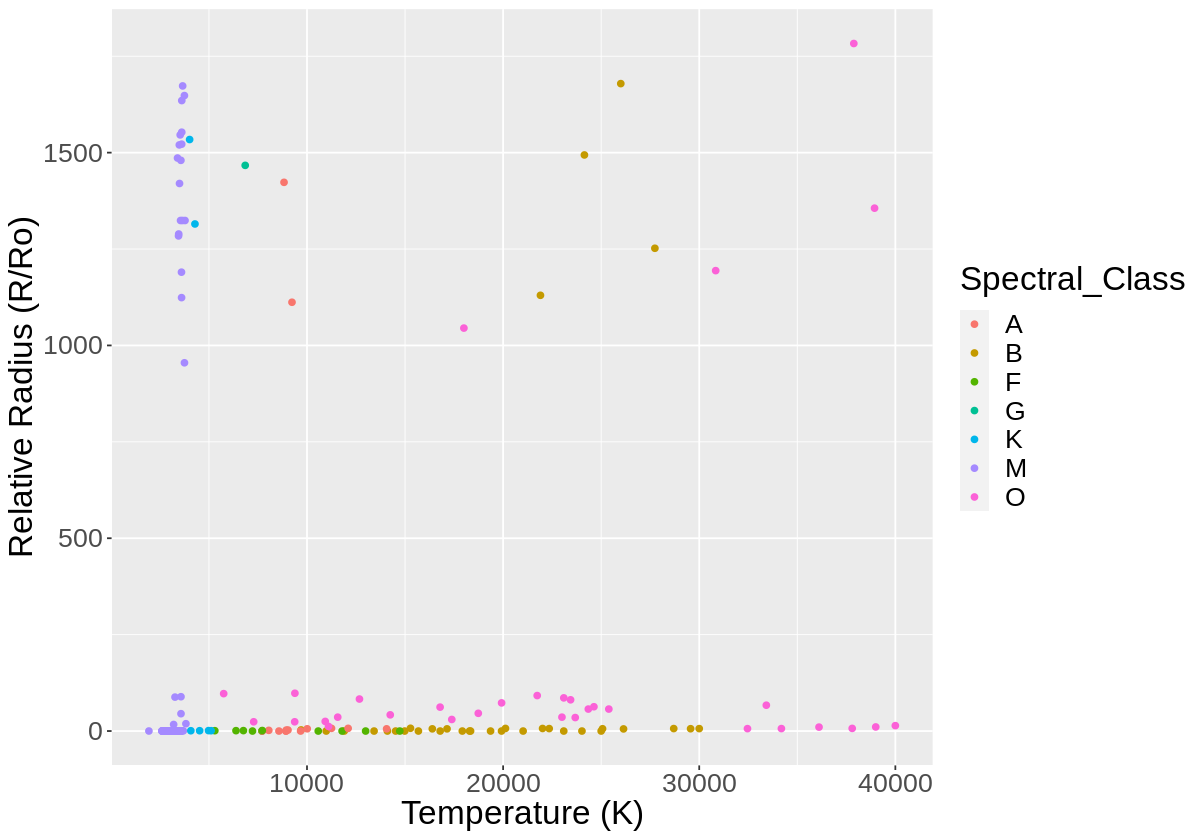

In [7]:
options(repr.plot.width = 10, repr.plot.height = 7)

stars_plot <- ggplot(stars_train, aes(x= Temperature, y= R, colour= Spectral_Class))+
geom_point()+
xlab("Temperature (K)")+
ylab("Relative Radius (R/Ro)")+
theme(text = element_text(size = 20))
stars_plot

#Visualization of training data of star spectral type based on predictors Temperature and Relative Radius

Most O and B stars have high temperature and low absolute magnitude. Most M, F and G stars have low temperature and average absolute magnitude. 



__Methods__

I will conduct my data analysis by using classification techniques like K-nearest neighbors classification and performing cross validation to find the best K value to make sure my classifier is as accurate as possible. The variables Temperature (K) and Relative Radius (R/Ro, Ro= radius of the Sun) seem to have the most influence on spectral class of stars which is what I am basing the classification of my stars on. Other predictors like relative luminosity, color and absolute magnitude are not being included. Luminosity is not considered a great predictor because its range is very large (100 000-0.01). Color is not an ideal predictor because it is not a quantitative variable. Absolute Magnitude is not included because it measures the brightness of a star when viewed from a standard distance, which is quite similar to Luminosity. I will visualize my results in a scatter plot with predictors Temperature and Relative Radius as my axes and colour the points based on the spectral class. By using a classification model, I will try and predict my fruit with specific Temperature and radius values. 


__Expected Outcomes and Significance__

I expect to find out if we can predict what spectral type a star is based on its temperature and relative radius by performing K-nearest neighbors’ classification and tuning my model with cross fold validation to ensure my classifier is as accurate as possible. These findings can help astronomers, physicists or anyone interested in the galaxy identify the spectral class of stars by their temperature and radius, as well as help them better understand the different types of stars in the universe. The results from this project can further lead to questions regarding the electromagnetic radiation emissions from these stars and how they affect the Earth and other planets. 